In [182]:
#KNN

In [183]:
import numpy as np
import pandas as pd

In [184]:
train = np.load ('train.npy')
test = np.load ('test.npy')

In [185]:
'''
train = train[6] #train[0] = train1
ttest = test[6] #test[0] = test1
'''

'\ntrain = train[6] #train[0] = train1\nttest = test[6] #test[0] = test1\n'

In [193]:
len(train[0][0])

582

In [194]:
from sklearn.neighbors import KNeighborsRegressor


In [195]:
modelo = KNeighborsRegressor(n_neighbors=5, metric = 'manhattan')

In [206]:
y_prds = list()
y_test2 = list()
media = 0

#Entrenamos el modelo
for i in range(len(train)):
    x_train = pd.DataFrame(train[i])
    y_train = np.array(["carton"]*int(train[i].shape[0]/3) +  ["plastico"]*int(train[i].shape[0]/3) +  ["cristal"]*int(train[i].shape[0]/3))
    x_train = scaler.fit_transform(x_train)
    #X_test = scaler.transform(X_test)
    modelo.fit(x_train,y_train)
    #media = media + (y_train) == modelo.predict(x_train).mean()
    print('Accuracy of K-NN classifier on training set: {:.2f}'.format(modelo.score(x_train, y_train)))
    print('Accuracy of K-NN classifier on test set: {:.2f}'.format(modelo.score(x_test, y_test)))

TypeError: cannot perform reduce with flexible type

In [127]:
from sklearn.neighbors import KNeighborsRegressor

In [145]:

modelo = KNeighborsRegressor(n_neighbors=5, metric = 'manhattan')
modelo.fit(x_train,y_train)
y_prds = modelo.predict(x_test)


In [176]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(train, test, stratify = y, random_state = 0, train_size = 0.7)


modelo = neighbors.KNeighborsClassifier(n_neighbors=3,metric = 'manhattan')
modelo.fit(x_train, y_train)

y_pred = modelo.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

ValueError: Found array with dim 3. Estimator expected <= 2.

In [120]:
from sklearn.model_selection import cross_val_score

In [121]:
all_accuracies = cross_val_score(estimator=modelo, X=x_train, y=y_train, cv=5)
print(all_accuracies)

[ 0.         -3.89        0.         -4.95333333  0.        ]


In [113]:
from sklearn.metrics import mean_squared_error

In [114]:
comp = pd.DataFrame({'real' : y_test , 'preds' : y_pred })
comp

ValueError: arrays must all be same length

In [51]:
accuracy_score(y_test, y_pred)

0.9833333333333333

In [57]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import itertools 

In [58]:
cm = confusion_matrix(y_test, y_pred)
cm #[carton, cristal, plastico]

array([[40,  0,  0],
       [ 0, 40,  0],
       [ 0,  2, 38]], dtype=int64)

In [59]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks([-0.5,0,1,2,2.5], ["","carton","cristal","plastico"])

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalizar matriz de confusion")
    else:
        print('Matriz de confusion')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Matriz de confusion
[[40  0  0]
 [ 0 40  0]
 [ 0  2 38]]


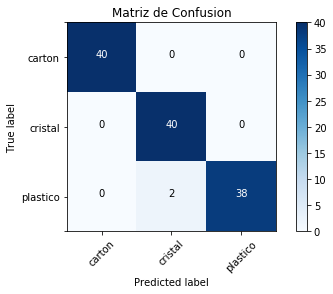

In [60]:
# Plot non-normalized confusion matrix
plt.figure() #num=None, figsize=(8, 6), dpi=80
plot_confusion_matrix(cm, classes= ["carton","cristal","plastico"], title='Matriz de Confusion')